In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [51]:
cities = pd.read_excel('City.xlsx', index_col = 0)

In [52]:
cities = cities[:23]
cities

,AllSpend,Rice_Grains,Tubers,Fish,Meat,Eggs_Dairy,Vegetables,Legumes,Fruits,Oils_Fats,Beverages,Spices,Other_consumables,Prepared_Food,Tobacco
Year,,,,,,,,,,,,,,,
2000,96732.0,18857.0,1129.0,9745.0,6638.0,6912.0,7124.0,4629.0,4683.0,4032.0,4456.0,2712.0,2600.0,13928.0,9170.0
2001,109119.0,18552.0,1166.0,10592.0,7189.0,7791.0,7580.0,4695.0,4914.0,4219.0,5078.0,2901.0,2873.0,17865.0,13544.0
2002,144352.0,23602.0,1272.0,12302.0,9033.0,9843.0,10962.0,4824.0,7853.0,4975.0,6013.0,3658.0,3856.0,30584.0,15408.0
2003,155686.0,21468.0,1285.0,14247.0,9504.0,9972.0,12159.0,5183.0,8908.0,5361.0,6022.0,3700.0,3706.0,34915.0,19107.0
2004,155169.0,20665.0,1320.0,13645.0,9407.0,10434.0,11282.0,4850.0,8254.0,5831.0,6126.0,3728.0,3831.0,37048.0,18577.0
2005,168765.0,22696.0,1369.0,14218.0,9147.0,11840.0,12182.0,5405.0,9088.0,5820.0,7237.0,4138.0,4605.0,41282.0,19599.0
2006,176752.5,26508.5,1405.0,14943.5,8532.5,12295.5,13029.0,5542.0,8555.5,5906.5,7519.5,4261.5,4636.5,43581.0,19967.0
2007,184740.0,30321.0,1441.0,15669.0,7918.0,12751.0,13876.0,5679.0,8023.0,5993.0,7802.0,4385.0,4668.0,45880.0,20335.0
2008,201218.0,32557.0,1638.0,15435.0,9434.0,14809.0,14220.0,6002.0,11346.0,6140.0,7996.0,4267.0,5677.0,52116.0,19580.0


In [53]:
#Grangers Causality Test

# null hypothesis that the coefficients of past values in the regression equation is zero.
# if p-value <0.05, reject H0. Thus coefficient is not 0 and there is causality, influences each other
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Create an empty DataFrame to store the results
columns = cities.columns
results_matrix = pd.DataFrame(index=columns, columns=columns)

# Perform Granger causality tests and store the results in the matrix
for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            data = cities[[col1, col2]].dropna()
            results = grangercausalitytests(data, maxlag=2, verbose=False)
            p_value = results[2][0]['ssr_ftest'][1]  # Get the p-value
            results_matrix.loc[col1, col2] = p_value

In [54]:
results_matrix.to_csv('results_matrix.csv')

In [55]:
import pandas as pd
from statsmodels.tsa.stattools import coint

# Assuming train_data is your DataFrame
columns = cities.columns
cointegration_matrix = pd.DataFrame(index=columns, columns=columns)

# Perform cointegration tests and fill the matrix
for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            result = coint(cities[col1], cities[col2])
            p_value = result[1]  # Get the p-value
            if p_value < 0.05:
                cointegration_matrix.loc[col1, col2] = 'Yes'
            else:
                cointegration_matrix.loc[col1, col2] = 'No'

# Display the cointegration matrix
print(cointegration_matrix)


                  AllSpend Rice_Grains Tubers Fish Meat Eggs_Dairy Vegetables   
AllSpend               NaN          No     No   No   No         No        Yes  \
Rice_Grains             No         NaN     No   No   No         No         No   
Tubers                  No          No    NaN   No  Yes         No         No   
Fish                    No          No     No  NaN   No         No         No   
Meat                    No          No    Yes  Yes  NaN         No        Yes   
Eggs_Dairy              No          No     No   No  Yes        NaN         No   
Vegetables             Yes         Yes     No  Yes  Yes         No        NaN   
Legumes                Yes          No     No   No   No         No         No   
Fruits                  No          No    Yes   No   No         No         No   
Oils_Fats               No          No     No   No   No         No         No   
Beverages              Yes          No     No  Yes  Yes        Yes         No   
Spices                  No  

In [56]:
cointegration_matrix.to_csv('cointegration.csv')

In [57]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
    "ADFuller test for Stationarity "
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}" Diff 2', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Reject H0.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Do not reject H0.")
        print(f" => Series is Non-Stationary.")    

In [58]:
for name, column in cities.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "AllSpend" Diff 2 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.0213
 No. Lags Chosen       = 1
 Critical value 1%     = -3.788
 Critical value 5%     = -3.013
 Critical value 10%    = -2.646
 => P-Value = 0.9945. Do not reject H0.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Rice_Grains" Diff 2 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.4612
 No. Lags Chosen       = 0
 Critical value 1%     = -3.77
 Critical value 5%     = -3.005
 Critical value 10%    = -2.643
 => P-Value = 0.8994. Do not reject H0.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Tubers" Diff 2 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 S

In [59]:
#Differencing 1st order
cities_diff1 = cities.diff().dropna()
cities_diff1

#fish, meat, vegies, spices, other_, prepared still not stationary

,AllSpend,Rice_Grains,Tubers,Fish,Meat,Eggs_Dairy,Vegetables,Legumes,Fruits,Oils_Fats,Beverages,Spices,Other_consumables,Prepared_Food,Tobacco
Year,,,,,,,,,,,,,,,
2001,12387.0,-305.0,37.0,847.0,551.0,879.0,456.0,66.0,231.0,187.0,622.0,189.0,273.0,3937.0,4374.0
2002,35233.0,5050.0,106.0,1710.0,1844.0,2052.0,3382.0,129.0,2939.0,756.0,935.0,757.0,983.0,12719.0,1864.0
2003,11334.0,-2134.0,13.0,1945.0,471.0,129.0,1197.0,359.0,1055.0,386.0,9.0,42.0,-150.0,4331.0,3699.0
2004,-517.0,-803.0,35.0,-602.0,-97.0,462.0,-877.0,-333.0,-654.0,470.0,104.0,28.0,125.0,2133.0,-530.0
2005,13596.0,2031.0,49.0,573.0,-260.0,1406.0,900.0,555.0,834.0,-11.0,1111.0,410.0,774.0,4234.0,1022.0
2006,7987.5,3812.5,36.0,725.5,-614.5,455.5,847.0,137.0,-532.5,86.5,282.5,123.5,31.5,2299.0,368.0
2007,7987.5,3812.5,36.0,725.5,-614.5,455.5,847.0,137.0,-532.5,86.5,282.5,123.5,31.5,2299.0,368.0
2008,16478.0,2236.0,197.0,-234.0,1516.0,2058.0,344.0,323.0,3323.0,147.0,194.0,-118.0,1009.0,6236.0,-755.0
2009,21762.0,425.0,38.0,1135.0,63.0,1893.0,1658.0,834.0,-522.0,2400.0,130.0,364.0,567.0,10660.0,2116.0


In [60]:
for name, column in cities_diff1.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "AllSpend" Diff 2 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.6892
 No. Lags Chosen       = 0
 Critical value 1%     = -3.788
 Critical value 5%     = -3.013
 Critical value 10%    = -2.646
 => P-Value = 0.0001. Reject H0.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Rice_Grains" Diff 2 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3544
 No. Lags Chosen       = 0
 Critical value 1%     = -3.788
 Critical value 5%     = -3.013
 Critical value 10%    = -2.646
 => P-Value = 0.0. Reject H0.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Tubers" Diff 2 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 

In [61]:
#2nd order differencing
cities_diff2 = cities_diff1.diff().dropna()

#Rerun Adfuller Test
for name, column in cities_diff2.items():
    adfuller_test(column, name=column.name)
    print('\n')
    
#other & tubers not stationary

    Augmented Dickey-Fuller Test on "AllSpend" Diff 2 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.3182
 No. Lags Chosen       = 0
 Critical value 1%     = -3.809
 Critical value 5%     = -3.022
 Critical value 10%    = -2.651
 => P-Value = 0.0. Reject H0.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Rice_Grains" Diff 2 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.5615
 No. Lags Chosen       = 1
 Critical value 1%     = -3.833
 Critical value 5%     = -3.031
 Critical value 10%    = -2.656
 => P-Value = 0.0. Reject H0.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Tubers" Diff 2 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.0

In [62]:
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Create Model with Only Vegies, Fruit, Prepared Food

In [63]:
# Train-test split: Use data from index 0 to 20 for training, and 21-22 for testing

# Cointegrated with All_Spend: Vegies, Legumes, Beverage, Prepared food
# Grangers Causality: Vegies, Fruit, Prepared food
train_data = cities_diff2[:19][['AllSpend', 'Vegetables', 'Fruits', 'Prepared_Food']]  # Data from 2000 to 2020
train_data

,AllSpend,Vegetables,Fruits,Prepared_Food
Year,,,,
2002,22846.0,2926.0,2708.0,8782.0
2003,-23899.0,-2185.0,-1884.0,-8388.0
2004,-11851.0,-2074.0,-1709.0,-2198.0
2005,14113.0,1777.0,1488.0,2101.0
2006,-5608.5,-53.0,-1366.5,-1935.0
2007,0.0,0.0,0.0,0.0
2008,8490.5,-503.0,3855.5,3937.0
2009,5284.0,1314.0,-3845.0,4424.0
2010,46936.0,1557.0,4527.0,15822.0


In [64]:
test_data = cities[21:23][['AllSpend','Vegetables', 'Fruits', 'Prepared_Food']]
test_data

,AllSpend,Vegetables,Fruits,Prepared_Food
Year,,,,
2021,681278.0,54678.0,30832.0,242214.0
2022,721084.0,55679.0,35233.0,246924.0


In [65]:
# 1. VAR Model
model_var = VAR(train_data)
model_var_fitted = model_var.fit()

In [66]:
model_var_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 09, Mar, 2024
Time:                     20:04:41
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    70.3764
Nobs:                     18.0000    HQIC:                   69.5236
Log likelihood:          -706.648    FPE:                1.44708e+30
AIC:                      69.3871    Det(Omega_mle):     5.42840e+29
--------------------------------------------------------------------
Results for equation AllSpend
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                 -323.758296      5501.961193           -0.059           0.953
L1.AllSpend             -0.747462         0.485221           -1.540           0.123
L1.Vegetables            2.423078         1.5

In [67]:
#Check for Serial Correlation of Residuals (Whether there is still hidden patterns that cant be explained by the model)
from statsmodels.stats.stattools import durbin_watson

# Assuming var_model is your fitted VAR model
residuals = model_var_fitted.resid

# Perform Durbin-Watson test
dw_results = pd.DataFrame(index=residuals.columns, columns=['Durbin-Watson'])

for column in residuals.columns:
    dw_test_statistic = durbin_watson(residuals[column])
    dw_results.loc[column, 'Durbin-Watson'] = dw_test_statistic
    
dw_results

#All values close to 2, model is sufficient in explaining relationship between variables

,Durbin-Watson
AllSpend,1.523921
Vegetables,2.278323
Fruits,2.745229
Prepared_Food,1.862124


In [68]:
#Get the lag order of the var model
lag_order = model_var_fitted.k_ar
print(lag_order)

# Input data for forecasting
forecast_input = train_data.values[-lag_order:]
forecast_input

1


array([[17002., 10142.,  4968., -6987.]])

In [69]:
# Forecast VAR model for 2021 and 2022
nobs = 2
var_forecast = model_var_fitted.forecast(train_data.values, steps=2)  # Forecast 2 years
df_var_forecast = pd.DataFrame(var_forecast, columns=train_data.columns + '_2d')
df_var_forecast

,AllSpend_2d,Vegetables_2d,Fruits_2d,Prepared_Food_2d
0,-8103.070828,-5092.655560,-694.455400,21690.491629
1,8765.567276,-7629.325552,2685.647574,-15029.382274


In [70]:
def invert_transformation(df_train, df_forecast, second_diff):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff == True:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
        
    return df_fc

In [71]:
df_results = invert_transformation(train_data, df_var_forecast, second_diff=True)
df_results

,AllSpend_2d,Vegetables_2d,Fruits_2d,Prepared_Food_2d,AllSpend_1d,AllSpend_forecast,Vegetables_1d,Vegetables_forecast,Fruits_1d,Fruits_forecast,Prepared_Food_1d,Prepared_Food_forecast
0,-8103.070828,-5092.655560,-694.455400,21690.491629,23608.929172,40610.929172,4599.344440,14741.344440,12799.544600,17767.544600,17344.491629,10357.491629
1,8765.567276,-7629.325552,2685.647574,-15029.382274,32374.496448,72985.425620,-3029.981112,11711.363329,15485.192174,33252.736774,2315.109355,12672.600985


In [72]:
df_results = df_results.transpose()

In [73]:
df_results.rename(columns = {0:'2021', 1: 2022}, inplace = True)
df_results

,2021,2022
AllSpend_2d,-8103.070828,8765.567276
Vegetables_2d,-5092.655560,-7629.325552
Fruits_2d,-694.455400,2685.647574
Prepared_Food_2d,21690.491629,-15029.382274
AllSpend_1d,23608.929172,32374.496448
AllSpend_forecast,40610.929172,72985.425620
Vegetables_1d,4599.344440,-3029.981112
Vegetables_forecast,14741.344440,11711.363329
Fruits_1d,12799.544600,15485.192174
Fruits_forecast,17767.544600,33252.736774


# No Differencing 2023-2027 Forecast

In [81]:
train_data = cities[:21][['AllSpend','Vegetables', 'Fruits', 'Prepared_Food']]  # Data from 2000 to 2020
test_data = cities[21:23][['AllSpend', 'Vegetables', 'Fruits','Prepared_Food']]


In [82]:
model_var = VAR(train_data)
model_var_fitted = model_var.fit()
model_var_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 09, Mar, 2024
Time:                     23:41:40
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    68.1937
Nobs:                     20.0000    HQIC:                   67.3923
Log likelihood:          -765.495    FPE:                1.59405e+29
AIC:                      67.1979    Det(Omega_mle):     6.52924e+28
--------------------------------------------------------------------
Results for equation AllSpend
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const               -13650.783632     21986.568160           -0.621           0.535
L1.AllSpend              1.960761         0.529630            3.702           0.000
L1.Vegetables           -1.155165         3.0

In [83]:
#Check for Serial Correlation of Residuals (Whether there is still hidden patterns that cant be explained by the model)
from statsmodels.stats.stattools import durbin_watson

# Assuming var_model is your fitted VAR model
residuals = model_var_fitted.resid

# Perform Durbin-Watson test
dw_results = pd.DataFrame(index=residuals.columns, columns=['Durbin-Watson'])

for column in residuals.columns:
    dw_test_statistic = durbin_watson(residuals[column])
    dw_results.loc[column, 'Durbin-Watson'] = dw_test_statistic
    
dw_results

#All values close to 2, model is sufficient in explaining relationship between variables

,Durbin-Watson
AllSpend,2.357173
Vegetables,1.860573
Fruits,2.083926
Prepared_Food,2.1889


In [84]:
var_forecast = model_var_fitted.forecast(train_data.values, steps=2)  # Forecast 2 years
df_var_forecast = pd.DataFrame(var_forecast, columns=train_data.columns)
df_var_forecast

,AllSpend,Vegetables,Fruits,Prepared_Food
0,690643.039789,42192.737258,36729.831210,268458.231075
1,709048.091416,45813.986932,35659.374307,274907.309942


In [85]:
var_forecast_total = df_var_forecast['AllSpend'].iloc[:2].values
var_forecast_total

array([690643.03978895, 709048.09141617])

In [86]:
actual_total = test_data['AllSpend'].iloc[:2].values
actual_total

array([681278., 721084.])

In [87]:
# Calculate metrics for VAR
mae_var = mean_absolute_error(actual_total, var_forecast_total)
rmse_var = np.sqrt(mean_squared_error(actual_total, var_forecast_total))
mape_var = (np.abs((actual_total - var_forecast_total) / actual_total)).mean() * 100
smape_var = (np.abs(actual_total - var_forecast_total) / (np.abs(actual_total) + np.abs(var_forecast_total))).mean() * 100
mpe_var = ((var_forecast_total - actual_total) / actual_total).mean() * 100

# Calculate tracking signal for VAR
cumulative_forecast_error_var = np.cumsum(var_forecast_total - actual_total)
tracking_signal_var = cumulative_forecast_error_var / rmse_var  # Tracking Signal = Cumulative Forecast Error / RMSE

print("Metrics for 2021-2022 VAR Model:")
print(f"MAE: {mae_var:.2f}")
print(f"RMSE: {rmse_var:.2f}")
print(f"MAPE: {mape_var:.2f}%")
print(f"SMAPE: {smape_var:.2f}%")
print(f"MPE: {mpe_var:.2f}%")
print(f"Tracking Signal: {tracking_signal_var}")

Metrics for 2021-2022 VAR Model:
MAE: 10700.47
RMSE: 10783.48
MAPE: 1.52%
SMAPE: 0.76%
MPE: -0.15%
Tracking Signal: [ 0.8684614  -0.24768143]


In [88]:
#Supress scientific notation in pandas
pd.options.display.float_format = '{:.2f}'.format

In [89]:
cities_3v = cities[['AllSpend','Vegetables', 'Fruits','Prepared_Food']]
cities_3v

,AllSpend,Vegetables,Fruits,Prepared_Food
Year,,,,
2000,96732.00,7124.00,4683.00,13928.00
2001,109119.00,7580.00,4914.00,17865.00
2002,144352.00,10962.00,7853.00,30584.00
2003,155686.00,12159.00,8908.00,34915.00
2004,155169.00,11282.00,8254.00,37048.00
2005,168765.00,12182.00,9088.00,41282.00
2006,176752.50,13029.00,8555.50,43581.00
2007,184740.00,13876.00,8023.00,45880.00
2008,201218.00,14220.00,11346.00,52116.00


In [100]:
# Forecast the next 5 years with VAR

model_var_2327 = VAR(cities_3v)
model_var_fitted2327 = model_var_2327.fit()

var_forecast2327 = model_var_fitted2327.forecast(cities_3v.values, steps=5)  # Forecast 5 years ahead
var_forecast2327df = pd.DataFrame(var_forecast2327, columns = cities_3v.columns)
var_forecast2327df

,AllSpend,Vegetables,Fruits,Prepared_Food
0,772210.14,55738.94,37805.03,268885.69
1,832739.51,59702.34,40410.19,297000.03
2,895607.59,64217.37,43659.66,324690.90
3,956752.51,68456.11,46719.46,350306.34
4,1018889.94,72822.03,49764.15,375750.47


In [104]:
model_var_fitted2327.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 10, Mar, 2024
Time:                     00:02:44
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    69.2251
Nobs:                     22.0000    HQIC:                   68.4669
Log likelihood:          -855.432    FPE:                4.43952e+29
AIC:                      68.2332    Det(Omega_mle):     1.95691e+29
--------------------------------------------------------------------
Results for equation AllSpend
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const               -11222.204493     20890.702359           -0.537           0.591
L1.AllSpend              2.076243         0.455011            4.563           0.000
L1.Vegetables           -2.659446         2.4

In [105]:
# Assuming var_model is your fitted VAR model
residuals = model_var_fitted2327.resid

# Perform Durbin-Watson test
dw_results = pd.DataFrame(index=residuals.columns, columns=['Durbin-Watson'])

for column in residuals.columns:
    dw_test_statistic = durbin_watson(residuals[column])
    dw_results.loc[column, 'Durbin-Watson'] = dw_test_statistic
    
dw_results

#All values close to 2, model is sufficient in explaining relationship between variables

,Durbin-Watson
AllSpend,2.48
Vegetables,1.66
Fruits,2.05
Prepared_Food,2.15


In [101]:
var_forecast2327df.index = range(2023,2028)
var_forecast2327df

,AllSpend,Vegetables,Fruits,Prepared_Food
2023,772210.14,55738.94,37805.03,268885.69
2024,832739.51,59702.34,40410.19,297000.03
2025,895607.59,64217.37,43659.66,324690.90
2026,956752.51,68456.11,46719.46,350306.34
2027,1018889.94,72822.03,49764.15,375750.47


In [102]:
var_final = pd.concat([cities_3v, var_forecast2327df], axis = 0)
var_final

,AllSpend,Vegetables,Fruits,Prepared_Food
2000,96732.00,7124.00,4683.00,13928.00
2001,109119.00,7580.00,4914.00,17865.00
2002,144352.00,10962.00,7853.00,30584.00
2003,155686.00,12159.00,8908.00,34915.00
2004,155169.00,11282.00,8254.00,37048.00
2005,168765.00,12182.00,9088.00,41282.00
2006,176752.50,13029.00,8555.50,43581.00
2007,184740.00,13876.00,8023.00,45880.00
2008,201218.00,14220.00,11346.00,52116.00
2009,222980.00,15878.00,10824.00,62776.00


In [106]:
var_final.to_csv('var_forecast.csv')

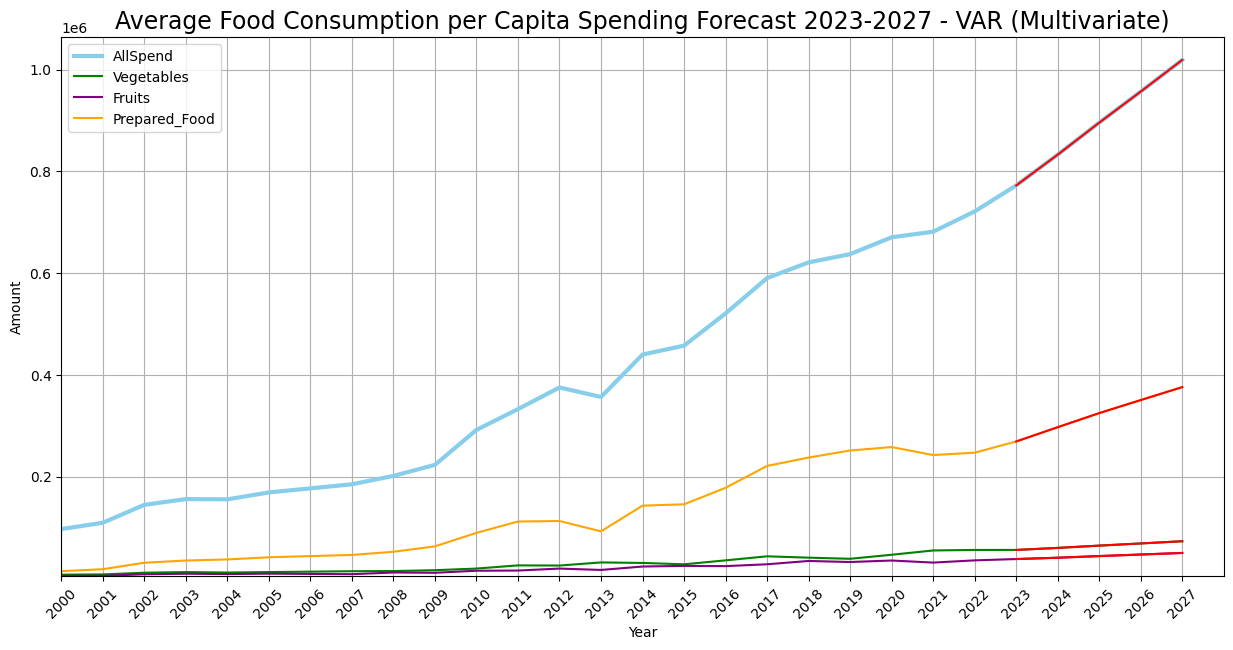

In [103]:
years = var_final.index

plt.figure(figsize = (15,7))
plt.xlim(2000, 2028)

ymin = var_final.min().min()
ymax = var_final.max().max()
y_range = ymax-ymin
ymax = y_range + 50000
plt.ylim(ymin, ymax)

# Define the columns to plot
cols = ['AllSpend', 'Vegetables', 'Fruits', 'Prepared_Food']

# Plot the data
for col in cols:
    if col == 'AllSpend':
        plt.plot(years, var_final[col], label=col, linewidth=3, color='skyblue')  # Plot AllSpend with thicker line
    elif col == 'Vegetables':
        plt.plot(years, var_final[col], label=col, linewidth = 1.5, color='green') 
    elif col == 'Fruits':
        plt.plot(years, var_final[col], label=col, linewidth = 1.5, color='purple')
    elif col == 'Prepared_Food':
        plt.plot(years, var_final[col], label=col, linewidth = 1.5, color='orange')
        
plt.legend()
# Plot the forecasted values
fc_years = range(2023, 2028)
for col in cols:
    plt.plot(fc_years, var_final[col].iloc[-5:], label=col + ' Forecast', color='red')

plt.xticks(years, rotation=45)

# Set plot title and labels
plt.title('Average Food Consumption per Capita Spending Forecast 2023-2027 - VAR (Multivariate)', size = 17)
plt.xlabel('Year')
plt.ylabel('Amount')
plt.grid(True)

plt.show()
